In [1]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits
import numpy as np

In [2]:
comps = ['full_de_Looze', 'all_lines_de_Looze','CO_all', 'CI_both','CII_de_Looze'] 
titles = ['All', 'Lines only', 'CO', '[CI]', '[CII]']

slice_list = [90,120,150,180]

#cube_path = '/Users/mbethermin/SIDES/PYSIDES/OUTPUTS/CUBES/Test_0p09deg2_'
cube_path = '/data/SIDES/PYSIDES_ORIGINAL_OUTPUTS/CUBES/pySIDES_from_original_CONCERTO_'
cube_ext = '_smoothed_MJy_sr.fits'

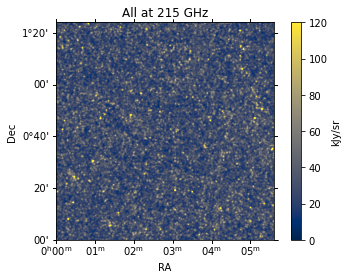

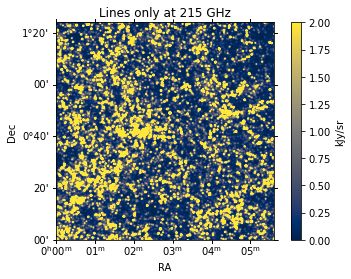

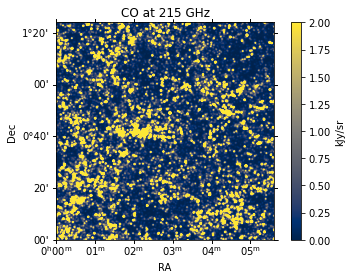

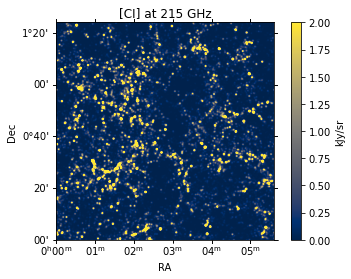

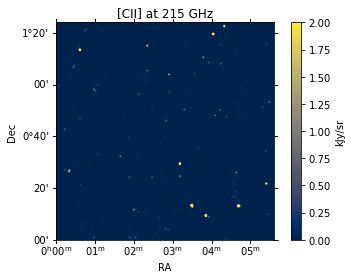

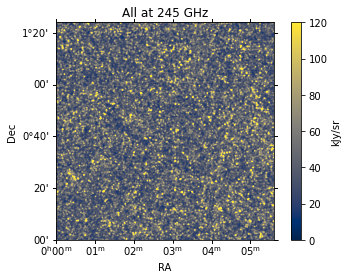

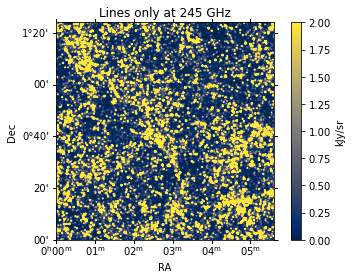

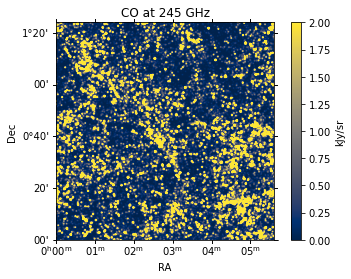

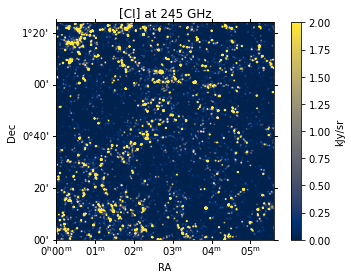

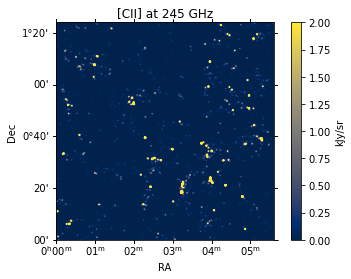

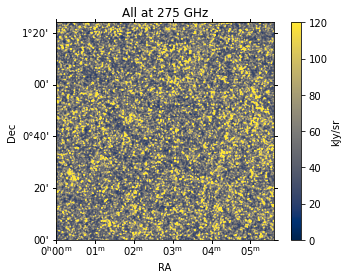

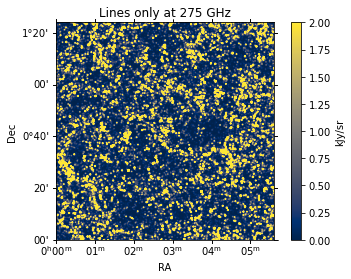

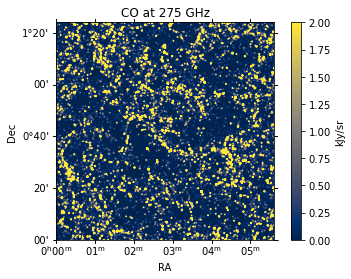

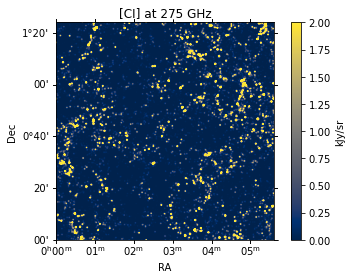

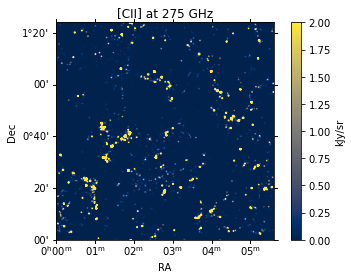

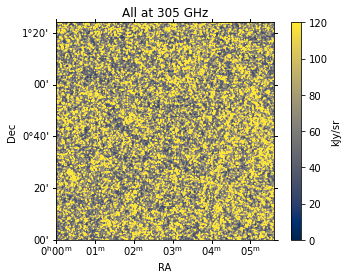

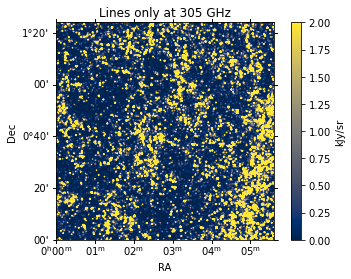

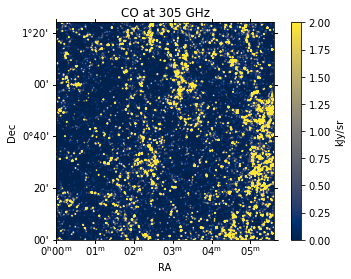

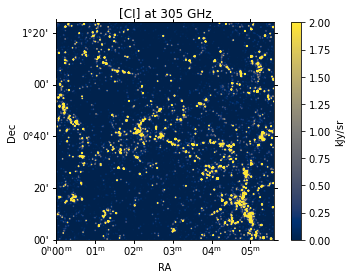

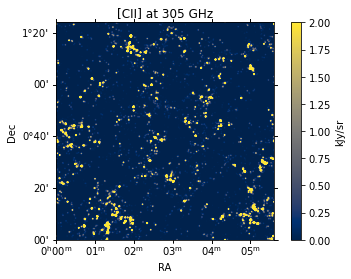

In [3]:
for slice_index in slice_list: 
    
    for comp, title in zip(comps, titles):
    
        path = cube_path+comp+cube_ext
        hdu = fits.open(path)
        wcs = WCS(hdu[0].header)
        
        freq = wcs.pixel_to_world(0,0,slice_index)[1].to('GHz')
        
        plt.subplot(projection=wcs[slice_index,:,:])
    
        vmin = 0.
        if comp == 'full_de_Looze':
            vmax = 120.e-3
        else:
            vmax = 2.e-3
    
        plt.imshow(1.e3 * hdu[0].data[slice_index,:,:], origin='lower', vmin = 1.e3*vmin, vmax = 1.e3*vmax, cmap = 'cividis')     
        plt.colorbar(label = 'kJy/sr')   
        plt.xlabel('RA')
        plt.ylabel('Dec')
        plt.title(title+' at {:0.0f}'.format(freq))
        plt.savefig('Slice_'+comp+'_{:0.0f}GHz.pdf'.format(freq.value), bbox_inches = 'tight', pad_inches = 0)
        plt.show()

In [4]:
#Nicer plots for the proposal

slice_index = 178
comps = ['full_de_Looze', 'all_lines_de_Looze', 'CII_de_Looze'] 
titles = ['All components', 'Lines only', '[CII]']

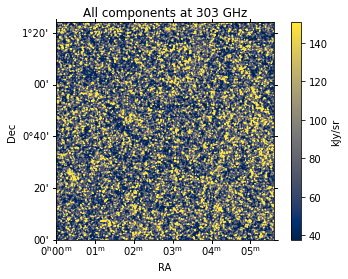

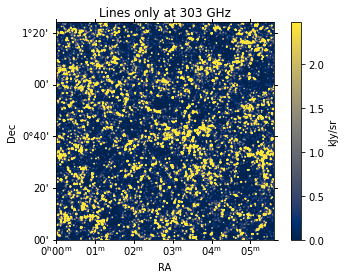

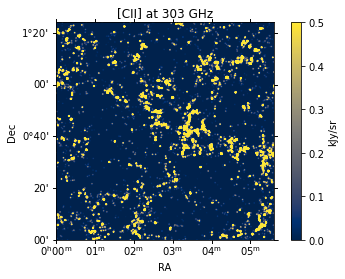

In [5]:
for comp, title in zip(comps, titles):
    
        path = cube_path+comp+cube_ext
        hdu = fits.open(path)
        wcs = WCS(hdu[0].header)
        
        freq = wcs.pixel_to_world(0,0,slice_index)[1].to('GHz')
        
        plt.subplot(projection=wcs[slice_index,:,:])
    
        if comp == 'full_de_Looze' or comp == 'all_lines_de_Looze':
            vmax = np.percentile(hdu[0].data[slice_index,:,:], 90)
            if comp == 'full_de_Looze':
                vmin = np.percentile(hdu[0].data[slice_index,:,:], 10)
            else:
                vmin = 0.
                
        if comp == 'CII_de_Looze':
            vmin = 0.
            vmax = 0.5e-3
    
        plt.imshow(1.e3 * hdu[0].data[slice_index,:,:], origin='lower', vmin = 1.e3*vmin, vmax = 1.e3*vmax, cmap = 'cividis')     
        plt.colorbar(label = 'kJy/sr')   
        plt.xlabel('RA')
        plt.ylabel('Dec')
        plt.title(title+' at {:0.0f}'.format(freq))
        plt.savefig('Slice_'+comp+'_{:0.0f}GHz_4proposal.pdf'.format(freq.value), bbox_inches = 'tight', pad_inches = 0)
        plt.show()